# San Francisco AirBnB Data Analysis

The goal of the project is to understand the impact of COVID-19 on the AirBNB listings in San Francisco. Particulary this project aims to answer the following questions:

1. What has been the influence of COVID-19 on the number of listings and types of rooms being listed on AirBNB?
2. What has been the impact of lockdown on the listing prices. Were certain room or property types more affected than others?
3. How has the importance of cleanliness score changed during the pandemic?


**Importing libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore')
import datetime

import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS

## Data Gathering

The data has been downloaded from InsideAirBNB and stored in listings folder. These files will be read into dataframes

In [2]:
#appending each csv in listings folder to a list
path='listings'
data=[]
for file in os.listdir(path):
    data.append(pd.read_csv(path + '/' + file))

In [3]:
#concating all the dataframes
df=pd.concat(data,sort=False)
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,958,https://www.airbnb.com/rooms/958,20190109044504,2019-01-09,"Bright, Modern Garden Unit - 1BR/1B",Our bright garden unit overlooks a grassy back...,"Newly remodeled, modern, and bright garden uni...",Our bright garden unit overlooks a grassy back...,none,*Quiet cul de sac in friendly neighborhood *St...,...,t,f,moderate,f,f,1,1,0,0,1.53
1,5858,https://www.airbnb.com/rooms/5858,20190109044504,2019-01-09,Creative Sanctuary,NaN,We live in a large Victorian house on a quiet ...,We live in a large Victorian house on a quiet ...,none,I love how our neighborhood feels quiet but is...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.94
2,7918,https://www.airbnb.com/rooms/7918,20190109044504,2019-01-09,A Friendly Room - UCSF/USF - San Francisco,Nice and good public transportation. 7 minute...,Room rental-sunny view room/sink/Wi Fi (inner ...,Nice and good public transportation. 7 minute...,none,"Shopping old town, restaurants, McDonald, Whol...",...,f,f,strict_14_with_grace_period,f,f,9,0,9,0,0.15
3,8142,https://www.airbnb.com/rooms/8142,20190109044504,2019-01-09,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,Room rental Sunny view Rm/Wi-Fi/TV/sink/large ...,Nice and good public transportation. 7 minute...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,9,0,9,0,0.15
4,8339,https://www.airbnb.com/rooms/8339,20190109044504,2019-01-09,Historic Alamo Square Victorian,Pls email before booking. Interior featured i...,Please send us a quick message before booking ...,Pls email before booking. Interior featured i...,none,NaN,...,f,f,strict_14_with_grace_period,t,t,2,2,0,0,0.24


The listings as scraped in months of January to July in 2019 and 2020 have been read into the dataframe df

## Data Wrangling

**Data Assessment**

In [4]:
df.shape

(108869, 106)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108869 entries, 0 to 7525
Columns: 106 entries, id to reviews_per_month
dtypes: float64(22), int64(21), object(63)
memory usage: 88.9+ MB


In [6]:
list(df.columns)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


In [7]:
df.room_type.value_counts()

Entire home/apt    65446
Private room       39368
Shared room         3281
Hotel room           774
Name: room_type, dtype: int64

In [8]:
df.property_type.value_counts()

Apartment                  43328
House                      29967
Condominium                11423
Guest suite                 7638
Boutique hotel              3746
Serviced apartment          3269
Hotel                       2092
Townhouse                   1894
Loft                        1386
Hostel                      1159
Guesthouse                   671
Aparthotel                   528
Bed and breakfast            465
Other                        298
Bungalow                     223
Resort                       201
Cottage                      181
Villa                        149
Tiny house                    54
Castle                        50
Cabin                         34
Boat                          31
Earth house                   25
Hut                           14
In-law                        14
Timeshare                      7
Treehouse                      6
Camper/RV                      5
Cycladic house (Greece)        4
Farm stay                      2
Tent      

In [9]:
df.neighbourhood_cleansed.value_counts()

Mission                  10102
Downtown/Civic Center     9300
South of Market           9014
Western Addition          8420
Castro/Upper Market       5952
Bernal Heights            5418
Haight Ashbury            5244
Noe Valley                4467
Outer Sunset              4080
Nob Hill                  3989
Potrero Hill              3241
Inner Richmond            2857
North Beach               2627
Russian Hill              2620
Marina                    2619
Bayview                   2609
Financial District        2537
Excelsior                 2361
Pacific Heights           2256
Inner Sunset              2241
Outer Mission             2238
Outer Richmond            2237
Chinatown                 1904
Parkside                  1847
West of Twin Peaks        1795
Ocean View                1657
Visitacion Valley          954
Twin Peaks                 929
Glen Park                  899
Lakeshore                  795
Crocker Amazon             670
Presidio Heights           384
Seacliff

In [10]:
df.price.head()

0    $170.00
1    $235.00
2     $65.00
3     $65.00
4    $785.00
Name: price, dtype: object

In [11]:
df.columns[df.isnull().sum()!=0]

Index(['summary', 'space', 'description', 'neighborhood_overview', 'notes',
       'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url',
       'medium_url', 'xl_picture_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'bathrooms', 'bedrooms', 'beds', 'square_feet', 'weekly_price',
       'monthly_price', 'security_deposit', 'cleaning_fee', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_va

1. The last_scraped column must be datetime object
2. The price column must be float type.
3. 54 columns have missing values

**Data Cleaning**

In [12]:
df_clean=df.copy()

In [13]:
#converting last_scraped column to datetimeobject
df_clean.last_scraped=pd.to_datetime(df_clean.last_scraped)
df_clean.last_scraped.head()

0   2019-01-09
1   2019-01-09
2   2019-01-09
3   2019-01-09
4   2019-01-09
Name: last_scraped, dtype: datetime64[ns]

In [14]:
#creating the month_year column of last scraped at
df_clean['month_year'] = df_clean.last_scraped.dt.to_period('M')
df_clean.month_year.head()

0    2019-01
1    2019-01
2    2019-01
3    2019-01
4    2019-01
Name: month_year, dtype: period[M]

In [15]:
#creating the month_name column of last scraped at
df_clean['month_name'] = df_clean.last_scraped.dt.month_name()
df_clean.month_name.head()

0    January
1    January
2    January
3    January
4    January
Name: month_name, dtype: object

In [16]:
#creating month column
df_clean['month'] = df_clean.last_scraped.dt.month
df_clean.month.head()

0    1
1    1
2    1
3    1
4    1
Name: month, dtype: int64

In [17]:
#creating year column
df_clean['year'] = df_clean.last_scraped.dt.year
df_clean.year.head()

0    2019
1    2019
2    2019
3    2019
4    2019
Name: year, dtype: int64

In [18]:
#converting price column from string type to float
df_clean.price=df_clean.price.str.replace('[^0-9.]','').astype(float)
df_clean.price.head()

0    170.0
1    235.0
2     65.0
3     65.0
4    785.0
Name: price, dtype: float64

In [19]:
df_clean.price.describe()

count    108869.000000
mean        222.609687
std         427.180970
min           0.000000
25%          99.000000
50%         150.000000
75%         238.000000
max       25000.000000
Name: price, dtype: float64

In [20]:
df_clean.query('price<10')

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,month_year,month_name,month,year
4252,20331804,https://www.airbnb.com/rooms/20331804,20190109044504,2019-01-09,Comfortable Victorian Bedroom in Mission,"Steps from Mission St, this room offers space ...","This is the master bedroom in the apartment, a...","Steps from Mission St, this room offers space ...",none,The apartment is located in the La Lengua Area...,...,f,4,1,3,0,0.50,2019-01,January,1,2019
3693,20331804,https://www.airbnb.com/rooms/20331804,20200104125913,2020-01-04,Comfortable Victorian Bedroom in Mission,"Steps from Mission St, this room offers space ...","This is the master bedroom in the apartment, a...","Steps from Mission St, this room offers space ...",none,The apartment is located in the La Lengua Area...,...,f,4,1,3,0,1.14,2020-01,January,1,2020
8381,40516145,https://www.airbnb.com/rooms/40516145,20200104125913,2020-01-04,Cozy Private Room; 8 mins to Dwntwn and SFO,We are kind and friendly people looking for wo...,NaN,We are kind and friendly people looking for wo...,none,NaN,...,f,2,0,2,0,2.00,2020-01,January,1,2020
4154,20331804,https://www.airbnb.com/rooms/20331804,20190201155620,2019-02-01,Comfortable Victorian Bedroom in Mission,"Steps from Mission St, this room offers space ...","This is the master bedroom in the apartment, a...","Steps from Mission St, this room offers space ...",none,The apartment is located in the La Lengua Area...,...,f,4,1,3,0,0.65,2019-02,February,2,2019
3640,20331804,https://www.airbnb.com/rooms/20331804,20200212052255,2020-02-12,Comfortable Victorian Bedroom in Mission,"Steps from Mission St, this room offers space ...","This is the master bedroom in the apartment, a...","Steps from Mission St, this room offers space ...",none,The apartment is located in the La Lengua Area...,...,f,4,1,3,0,1.09,2020-02,February,2,2020
4006,20331804,https://www.airbnb.com/rooms/20331804,20190306152813,2019-03-06,Comfortable Victorian Bedroom in Mission,"Steps from Mission St, this room offers space ...","This is the master bedroom in the apartment, a...","Steps from Mission St, this room offers space ...",none,The apartment is located in the La Lengua Area...,...,f,4,1,3,0,0.78,2019-03,March,3,2019
3565,20331804,https://www.airbnb.com/rooms/20331804,20200313233841,2020-03-14,Comfortable Victorian Bedroom in Mission,"Steps from Mission St, this room offers space ...","This is the master bedroom in the apartment, a...","Steps from Mission St, this room offers space ...",none,The apartment is located in the La Lengua Area...,...,f,4,1,3,0,1.05,2020-03,March,3,2020
3989,20331804,https://www.airbnb.com/rooms/20331804,20190403130253,2019-04-03,Comfortable Victorian Bedroom in Mission,"Steps from Mission St, this room offers space ...","This is the master bedroom in the apartment, a...","Steps from Mission St, this room offers space ...",none,The apartment is located in the La Lengua Area...,...,f,4,1,3,0,0.79,2019-04,April,4,2019
3411,20331804,https://www.airbnb.com/rooms/20331804,20200407152614,2020-04-07,Comfortable Victorian Bedroom in Mission,"Steps from Mission St, this room offers space ...","This is the master bedroom in the apartment, a...","Steps from Mission St, this room offers space ...",none,The apartment is located in the La Lengua Area...,...,f,4,1,3,0,1.02,2020-04,April,4,2020
3946,20331804,https://www.airbnb.com/rooms/20331804,20190503153007,2019-05-03,Comfortable Victorian Bedroom in Mission,"Steps from Mission St, this room offers space ...","This is the master bedroom in the apartment, a...","Steps from Mission St, this room offers space ...",none,The apartment is located in the La Lengua Area...,...,f,4,1,3,0,0.75,2019-05,May,5,2019


In [21]:
#removing listings with price less than 10 
df_clean=df_clean.query('price>10')

In [22]:
#creating two dataframes one with 2019 data and other with 2020
df_19=df_clean.query("year==2019")
df_20=df_clean.query("year==2020")

##  Data Analysis and Modeling

**1. What has been the influence of COVID-19 on the number of listings and types of rooms being listed on AirBNB?**

To understand the impact of COVID-19 on the number of listings, the change in number of listings from Jan to July in 2020 will be observed. Additionally the growth in listings in each month from 2019 to 2020 will be compared. After observing the general trend in the listings, the percentage change in type of rooms listed from 2019 to 2020 in each month will be compared. Since shelter in place orders have been issued in late March, comparing January and February to later months will throw light on the impact of COVID-19 on listings

In [23]:
#finding number of listings in each month
df_clean.groupby('month_year').id.count()

month_year
2019-01    7248
2019-02    7195
2019-03    7148
2019-04    7272
2019-05    7350
2019-06    7573
2019-07    7735
2020-01    8605
2020-02    8580
2020-03    8567
2020-04    8134
2020-05    8073
2020-06    7810
2020-07    7523
Freq: M, Name: id, dtype: int64

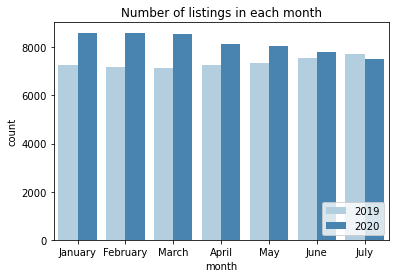

In [24]:
#plotting the count of listings in each month and year
sns.countplot(data = df_clean, x = 'month', hue = 'year', palette = 'Blues')
plt.xticks([0, 1, 2, 3, 4,5,6],
    ['January','February', 'March','April', 'May', 'June', 'July'])
plt.legend(loc='lower right')
plt.title('Number of listings in each month');

From the graph it can be seen that in 2019 the number of listings has remained constant or increased slightly moving from January to July. However in 2020, the number of listings started declining since March, which was the same time the shelter in place orders have been issued. Moreover the number of listings in Jan, Feb and March were higher in 2020 than in 2019. This gap gradually decreased over time and in July the number of listings in 2019 were higher than 2020.

In [25]:
"""
finding percentage difference in number of listings of each room type 
in each month from 2019 to 2020
"""
count_20=df_20.groupby(['month','room_type']).id.count().reset_index()
count_19=df_19.groupby(['month','room_type',]).id.count().reset_index()

diff=pd.merge(count_20, count_19,  how='outer', left_on=['month','room_type'], 
         right_on = ['month','room_type'])
diff.rename(columns={'id_x':'count_20','id_y':'count_19'}, inplace=True)
#NA values implies no such type of listing so replacing NA with 0
diff.fillna(0,inplace=True) 
#calculating % difference
diff['perc_diff']=(diff.count_20-diff.count_19)/(diff.count_20)
diff.head()

,month,room_type,count_20,count_19,perc_diff
0,1,Entire home/apt,5034,4472.0,0.111641
1,1,Hotel room,155,0.0,1.000000
2,1,Private room,3135,2582.0,0.176396
3,1,Shared room,281,194.0,0.309609
4,2,Entire home/apt,5072,4487.0,0.115339


In [26]:
perc_diff=diff.pivot(index='month', columns='room_type',values='perc_diff')
perc_diff

room_type,Entire home/apt,Hotel room,Private room,Shared room
month,,,,
1,0.111641,1.0,0.176396,0.309609
2,0.115339,1.0,0.173183,0.506623
3,0.137693,1.0,0.157827,0.428115
4,0.096516,1.0,0.074725,0.330798
5,0.062722,1.0,0.062717,0.447099
6,0.004549,1.0,0.025159,0.149813
7,-0.054248,1.0,-0.035055,0.080972


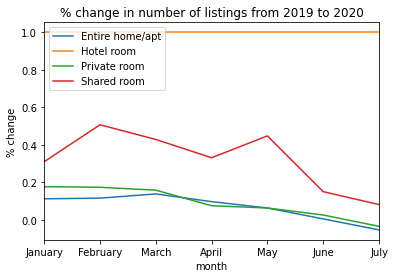

In [27]:
#plotting percentage change for each room type in each month
perc_diff.plot(kind='line',use_index=True, sort_columns=False)
plt.legend(loc='upper left')
plt.xticks([1, 2, 3, 4,5,6, 7],
    ['January','February', 'March','April', 'May', 'June', 'July'])
plt.ylabel('% change')
plt.title('% change in number of listings from 2019 to 2020');

From the graph it can be observed that the decrease in the growth of listings is highest for shared rooms as compared to entire home/apt and private room listings. This is intuitive as social distancing was encouraged. It is interesting, however to note that the growth in listings has increased from April to May. Some possible explanations of this could be the relaxation of shelter in place orders, dampening of fear of virus or anticipation of holiday visitors. The hotel room listings were not available in 2019, hence these are not considered.

**2. What has been the impact of lockdown on the listing prices. Were certain room types more affected than others?**

To understand the impact of lockdown on listing prices the variation of mean price and price distribution from 2019 to 2020 as well as over the months will be observed. For detailed analysis, changes specific to each room type will also be seen


In [28]:
#finding mean price for each month in each year
mean_price=df_clean.groupby(['month', 'year']).price.mean().reset_index()
mean_price=mean_price.pivot(index='month', columns='year', values='price')
mean_price

year,2019,2020
month,,
1,212.219371,229.301801
2,213.633773,226.398368
3,213.740907,227.949224
4,215.795655,224.975658
5,216.049932,231.532392
6,215.256966,234.398335
7,216.332773,235.657318


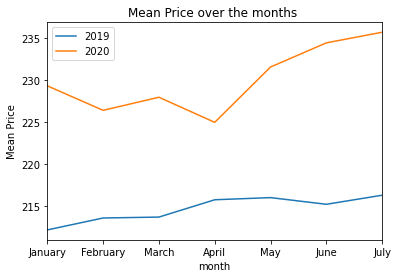

In [29]:
#plotting percentage change in mean price over months in each year
mean_price.plot(kind='line',use_index=True, sort_columns=False)
plt.legend(loc='upper left')
plt.xticks([1, 2, 3, 4,5,6, 7],
    ['January','February', 'March','April', 'May', 'June', 'July'])
plt.ylabel('Mean Price')
plt.title('Mean Price over the months ');

From the graph it can be seen that while in 2019 there has been a steady increase in the mean price, the mean price dipped in February and April. However the mean measure is usually affected by the outliers and moreover the dip in price is around 5$ only Hence no conclusions can be made and for more better understanding the distributions of prices will be observed

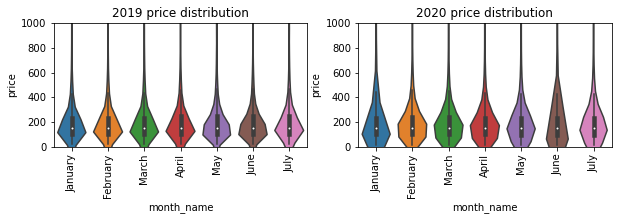

In [30]:
#plotting the price distribution
plt.figure(figsize=(10,5))

plt.subplot(2,2,1)
sns.violinplot(df_19.month_name, df_19.price)
plt.ylim((0,1000))
plt.xticks(rotation='vertical')
plt.title('2019 price distribution')

plt.subplot(2,2,2)
sns.violinplot(df_20.month_name, df_20.price)
plt.ylim((0,1000))
plt.xticks(rotation='vertical')
plt.title('2020 price distribution');

The distribution of price in 2019 has sharper peaks than in 2020. However there are no noticeable differences over the months except for greater number of outliers in June 2020. Hence it can be said that there hasn't been any direct effect of lockdown on the overall price distribution. Now the effects on different room types seperately

In [31]:
#calculating the percentage diff in mean price over months
price_20=df_20.groupby(['month','room_type']).price.mean().reset_index()
price_19=df_19.groupby(['month','room_type',]).price.mean().reset_index()

diff=pd.merge(price_20, price_19,  how='outer', left_on=['month','room_type'], 
         right_on = ['month','room_type'], suffixes=['_20', '_19'])

#NA values implies no such type of listing so replacing NA with 0
diff.fillna(0,inplace=True) 
#calculating % difference
diff['perc_diff']=(diff.price_20-diff.price_19)/(diff.price_20)
diff.head()

,month,room_type,price_20,price_19,perc_diff
0,1,Entire home/apt,275.041518,265.055233,0.036308
1,1,Hotel room,232.529032,0.000000,1.000000
2,1,Private room,167.913557,130.845081,0.220759
3,1,Shared room,92.996441,77.304124,0.168741
4,2,Entire home/apt,272.070781,264.366838,0.028316


In [32]:
perc_diff=diff.pivot(index='month', columns='room_type',values='perc_diff')
perc_diff

room_type,Entire home/apt,Hotel room,Private room,Shared room
month,,,,
1,0.036308,1.0,0.220759,0.168741
2,0.028316,1.0,0.189947,0.084631
3,0.017666,1.0,0.208824,0.110760
4,-0.013914,1.0,0.178243,0.196101
5,-0.015453,1.0,0.151036,0.112399
6,-0.001944,1.0,0.149981,0.187415
7,-0.011119,1.0,0.165508,0.204087


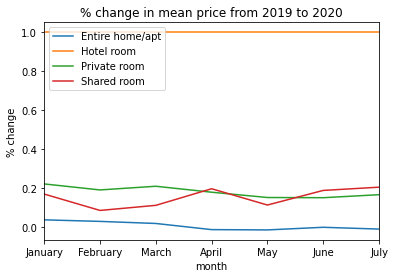

In [33]:
#plotting percentage change for each room type in each month
perc_diff.plot(kind='line',use_index=True, sort_columns=False)
plt.legend(loc='upper left')
plt.xticks([1, 2, 3, 4,5,6, 7],
    ['January','February', 'March','April', 'May', 'June', 'July'])
plt.ylabel('% change')
plt.title('% change in mean price from 2019 to 2020');

The growth in mean price of entire home/apt and private room has slighlty decreased or stayed constant over the months. The growth for shared rooms has peaked in April. It then decreased in May but again increased in June and July. The hotel rooms have not been available for 2019 and hence cannot be compared. The price distributions will give better understanding of the effect

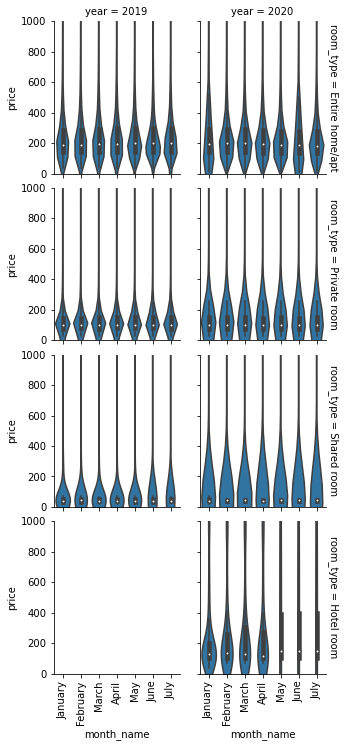

In [34]:
room_types=df_clean.room_type.unique()
g = sns.FacetGrid(data = df_clean, col = 'year', row = 'room_type', size = 2.5,
                margin_titles = True, row_order=room_types)
g.map(sns.violinplot, 'month_name','price')
g.set(ylim=(0, 1000))
g.set_xticklabels(rotation='vertical');

There are greater number of listings with higher than mean prices in 2020 than 2019 for all room types. However this trend has been consistent from January to July. Hence no significant effect on prices can be attributed to the lockdown.

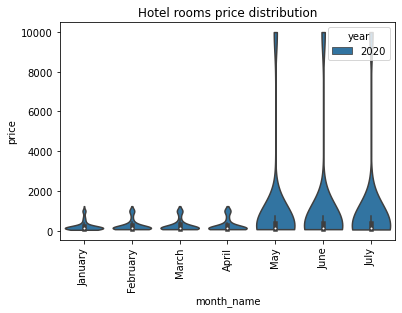

In [35]:
#exploring hotel rooms distribution
sns.violinplot(data=df_clean.query('room_type=="Hotel room"'),
              x='month_name', y='price', hue='year', cut=0)
plt.xticks(rotation='vertical')
plt.title('Hotel rooms price distribution');

It can be observed from the graph that there are greater number of hotel room listing with higher prices from May. One possible explanation of this could be that hotels started relying on the AirBNB due to low demand caused by lockdown

**3. How has the importance of cleanliness score changed during the pandemic?**

To answer this question, the variation in the correlation between price and cleanliness score will be studied.

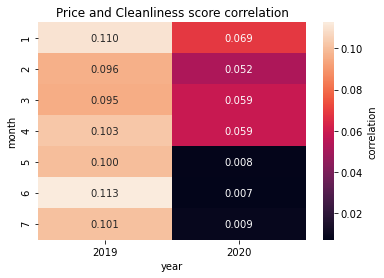

In [36]:
#plottin heatmap of correlation over the months
corr=(df_clean.groupby(['month', 'year'])['price',
    'review_scores_cleanliness'].corr().unstack().iloc[:,1]).reset_index()
corr.columns = ['month', 'year','corr']


corr = corr.pivot(index = 'month', columns = 'year',values = 'corr')
sns.heatmap(corr, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'correlation'})
plt.title('Price and Cleanliness score correlation');

Contrary to my expectation, the correlation between price and cleanliness score decreased from 2019 to 2020. It also showed a decreasing trend from January to July in 2020. One possible explanation of this finding is that with the pandemic, cleanliness has become a norm rather than an additional feature that will increase the value of the property and the price.

To further investigate the importance of cleanliness, a wordcloud of reviews will be generated to check whether there has been a significant change in the frequency of word clean in reviews.

In [37]:
#reading the reviews file
reviews=pd.read_csv('reviews.csv')
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,958,5977,2009-07-23,15695,Edmund C,"Our experience was, without a doubt, a five st..."
1,958,6660,2009-08-03,26145,Simon,Returning to San Francisco is a rejuvenating t...
2,958,11519,2009-09-27,25839,Denis,We were very pleased with the accommodations a...
3,958,16282,2009-11-05,33750,Anna,We highly recommend this accomodation and agre...
4,958,26008,2010-02-13,15416,Venetia,Holly's place was great. It was exactly what I...


In [38]:
#converting date column to datetime type 
reviews.date=pd.to_datetime(reviews.date)
#filtering for data after 1st Jan 2019 for easier analysis
reviews=reviews.query('datetime.date(2019, 1, 1)<date')

In [39]:
#removing punctuation from the comments column
def remove_punctuation(text):
    """ Returns the given text without punctuation"""
    no_punct="".join([ c for c in text if c not in string.punctuation])
    return no_punct

reviews['comments']=reviews['comments'].apply(lambda x: remove_punctuation(str(x)))
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
176,958,366553064,2019-01-02,80233494,Mitzi,A gem of a place We were in SF for our daughte...
177,958,368392795,2019-01-06,8761702,Renu,Fantastic and highly recommend
178,958,400345753,2019-01-11,201398768,Barbara,Hollys description of the apartment was totall...
179,958,413667035,2019-02-17,25563110,Melissa,Holly’s apartment is in a safe neighborhood on...
180,958,418277984,2019-03-01,98983872,Sarah,Holly’s apartment was great It was exactly as ...


In [40]:
#tokenizing the comments column
tokenizer=RegexpTokenizer(r'\w+')
reviews['comments']=reviews.comments.apply(lambda x
                                           : tokenizer.tokenize(x.lower()))
reviews.comments.head()

176    [a, gem, of, a, place, we, were, in, sf, for, ...
177                  [fantastic, and, highly, recommend]
178    [hollys, description, of, the, apartment, was,...
179    [holly, s, apartment, is, in, a, safe, neighbo...
180    [holly, s, apartment, was, great, it, was, exa...
Name: comments, dtype: object

In [41]:
#removing the stopwords
StopWords = stopwords.words("english")
def remove_stopwords(text):
    """ Returns the given text without stopwords"""
    words=[w for w in text if w not in StopWords]
    return words
reviews['comments']=reviews.comments.apply(lambda x: remove_stopwords(x))
reviews['comments'].head()

176    [gem, place, sf, daughter, wedding, n, judah, ...
177                       [fantastic, highly, recommend]
178    [hollys, description, apartment, totally, accu...
179    [holly, apartment, safe, neighborhood, quiet, ...
180    [holly, apartment, great, exactly, described, ...
Name: comments, dtype: object

For this analysis, only the adjectives will be considered as we are looking to see the change in descriptions of the listings

In [42]:
#getting the adjectives from comments column
def get_adjectives(text):
    """ Returns the adjectives in given text"""
    tags=nltk.pos_tag(text)
    return [ word for (word,tag) in tags if tag == "JJ"]

reviews['adjectives'] = reviews.comments.apply(lambda x: get_adjectives(x))
reviews['adjectives'].head()

176    [n, front, convenient, pleasant, beautiful, pe...
177                                          [fantastic]
178    [hollys, accurate, bright, light, appreciative...
179    [apartment, safe, quiet, dead, apartment, clea...
180                                   [apartment, great]
Name: adjectives, dtype: object

In [43]:
lemmatizer =WordNetLemmatizer()
def word_lemmatizer(text):
    """ Returns the lemmatized text"""
    lem_text=" ".join([lemmatizer.lemmatize(i) for i in text])
    return lem_text
reviews['adjectives']=reviews['adjectives'].apply(lambda x: word_lemmatizer(x))
reviews['adjectives'].head()

176        n front convenient pleasant beautiful perfect
177                                            fantastic
178    holly accurate bright light appreciative safe ...
179    apartment safe quiet dead apartment clean good...
180                                      apartment great
Name: adjectives, dtype: object

In [44]:
reviews.date=pd.to_datetime(reviews.date)

reviews_before=reviews.query('date<datetime.date(2020, 3, 20)')
reviews_after=reviews.query('date>=datetime.date(2020, 3, 20)')

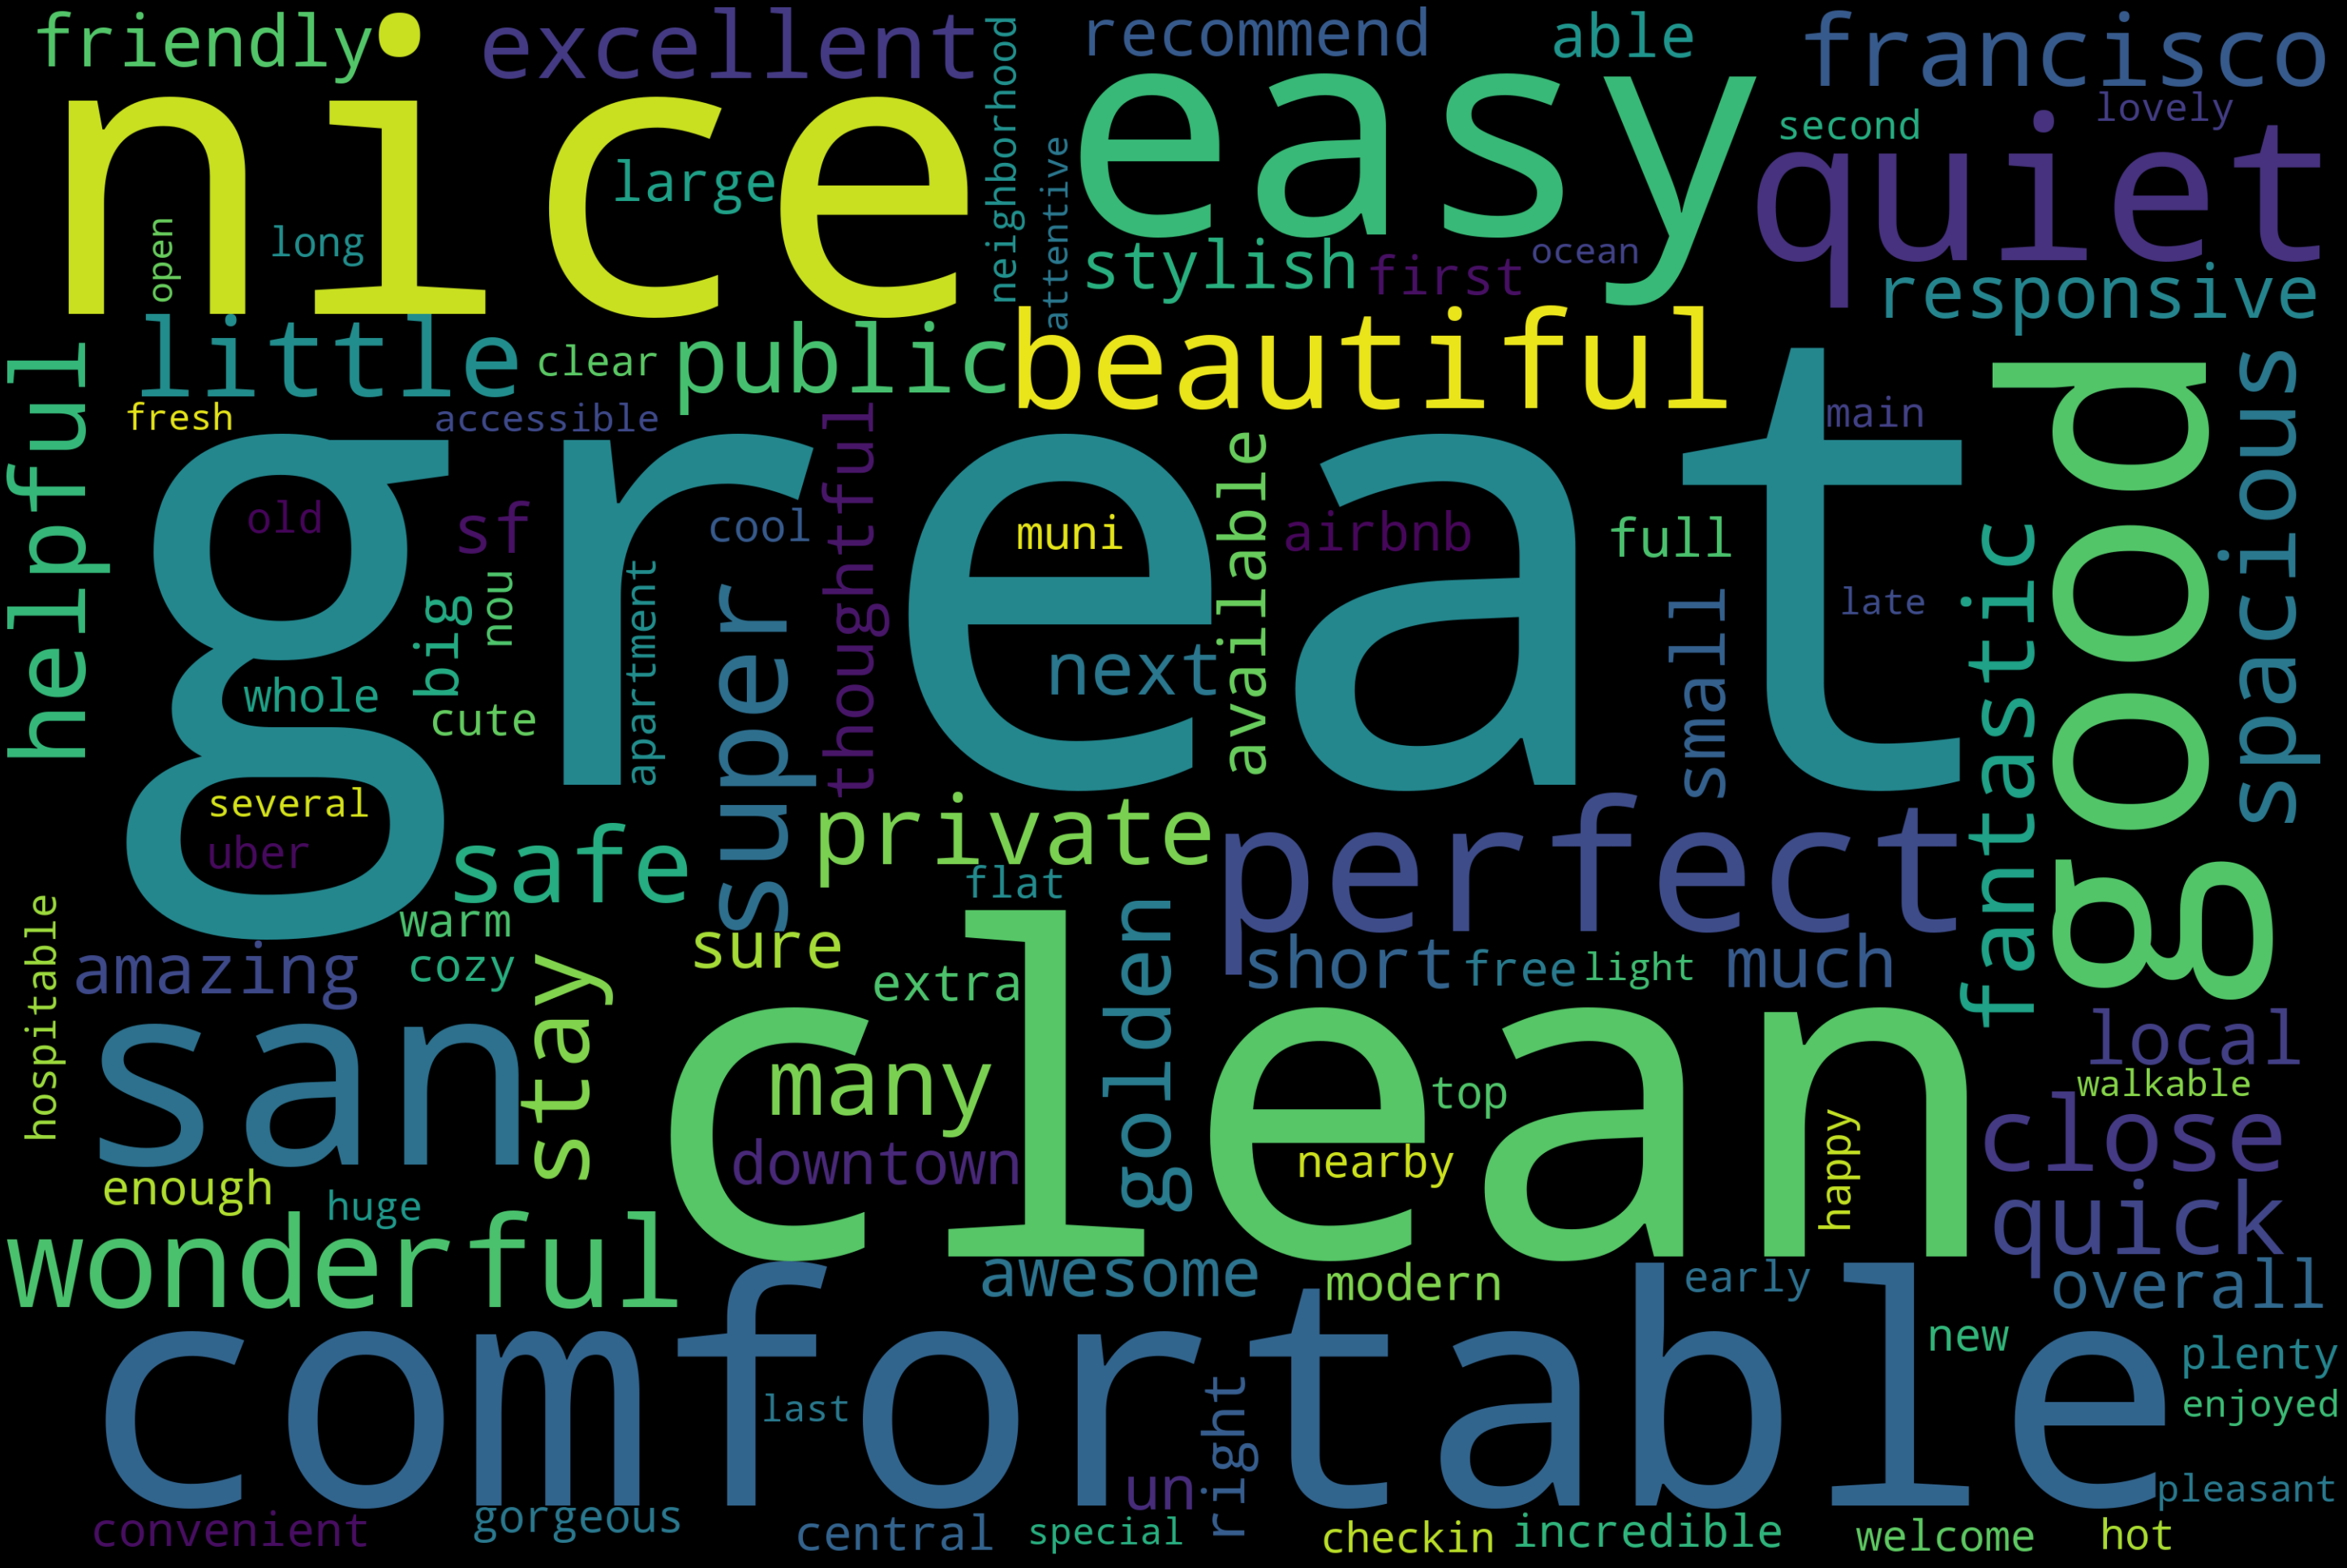

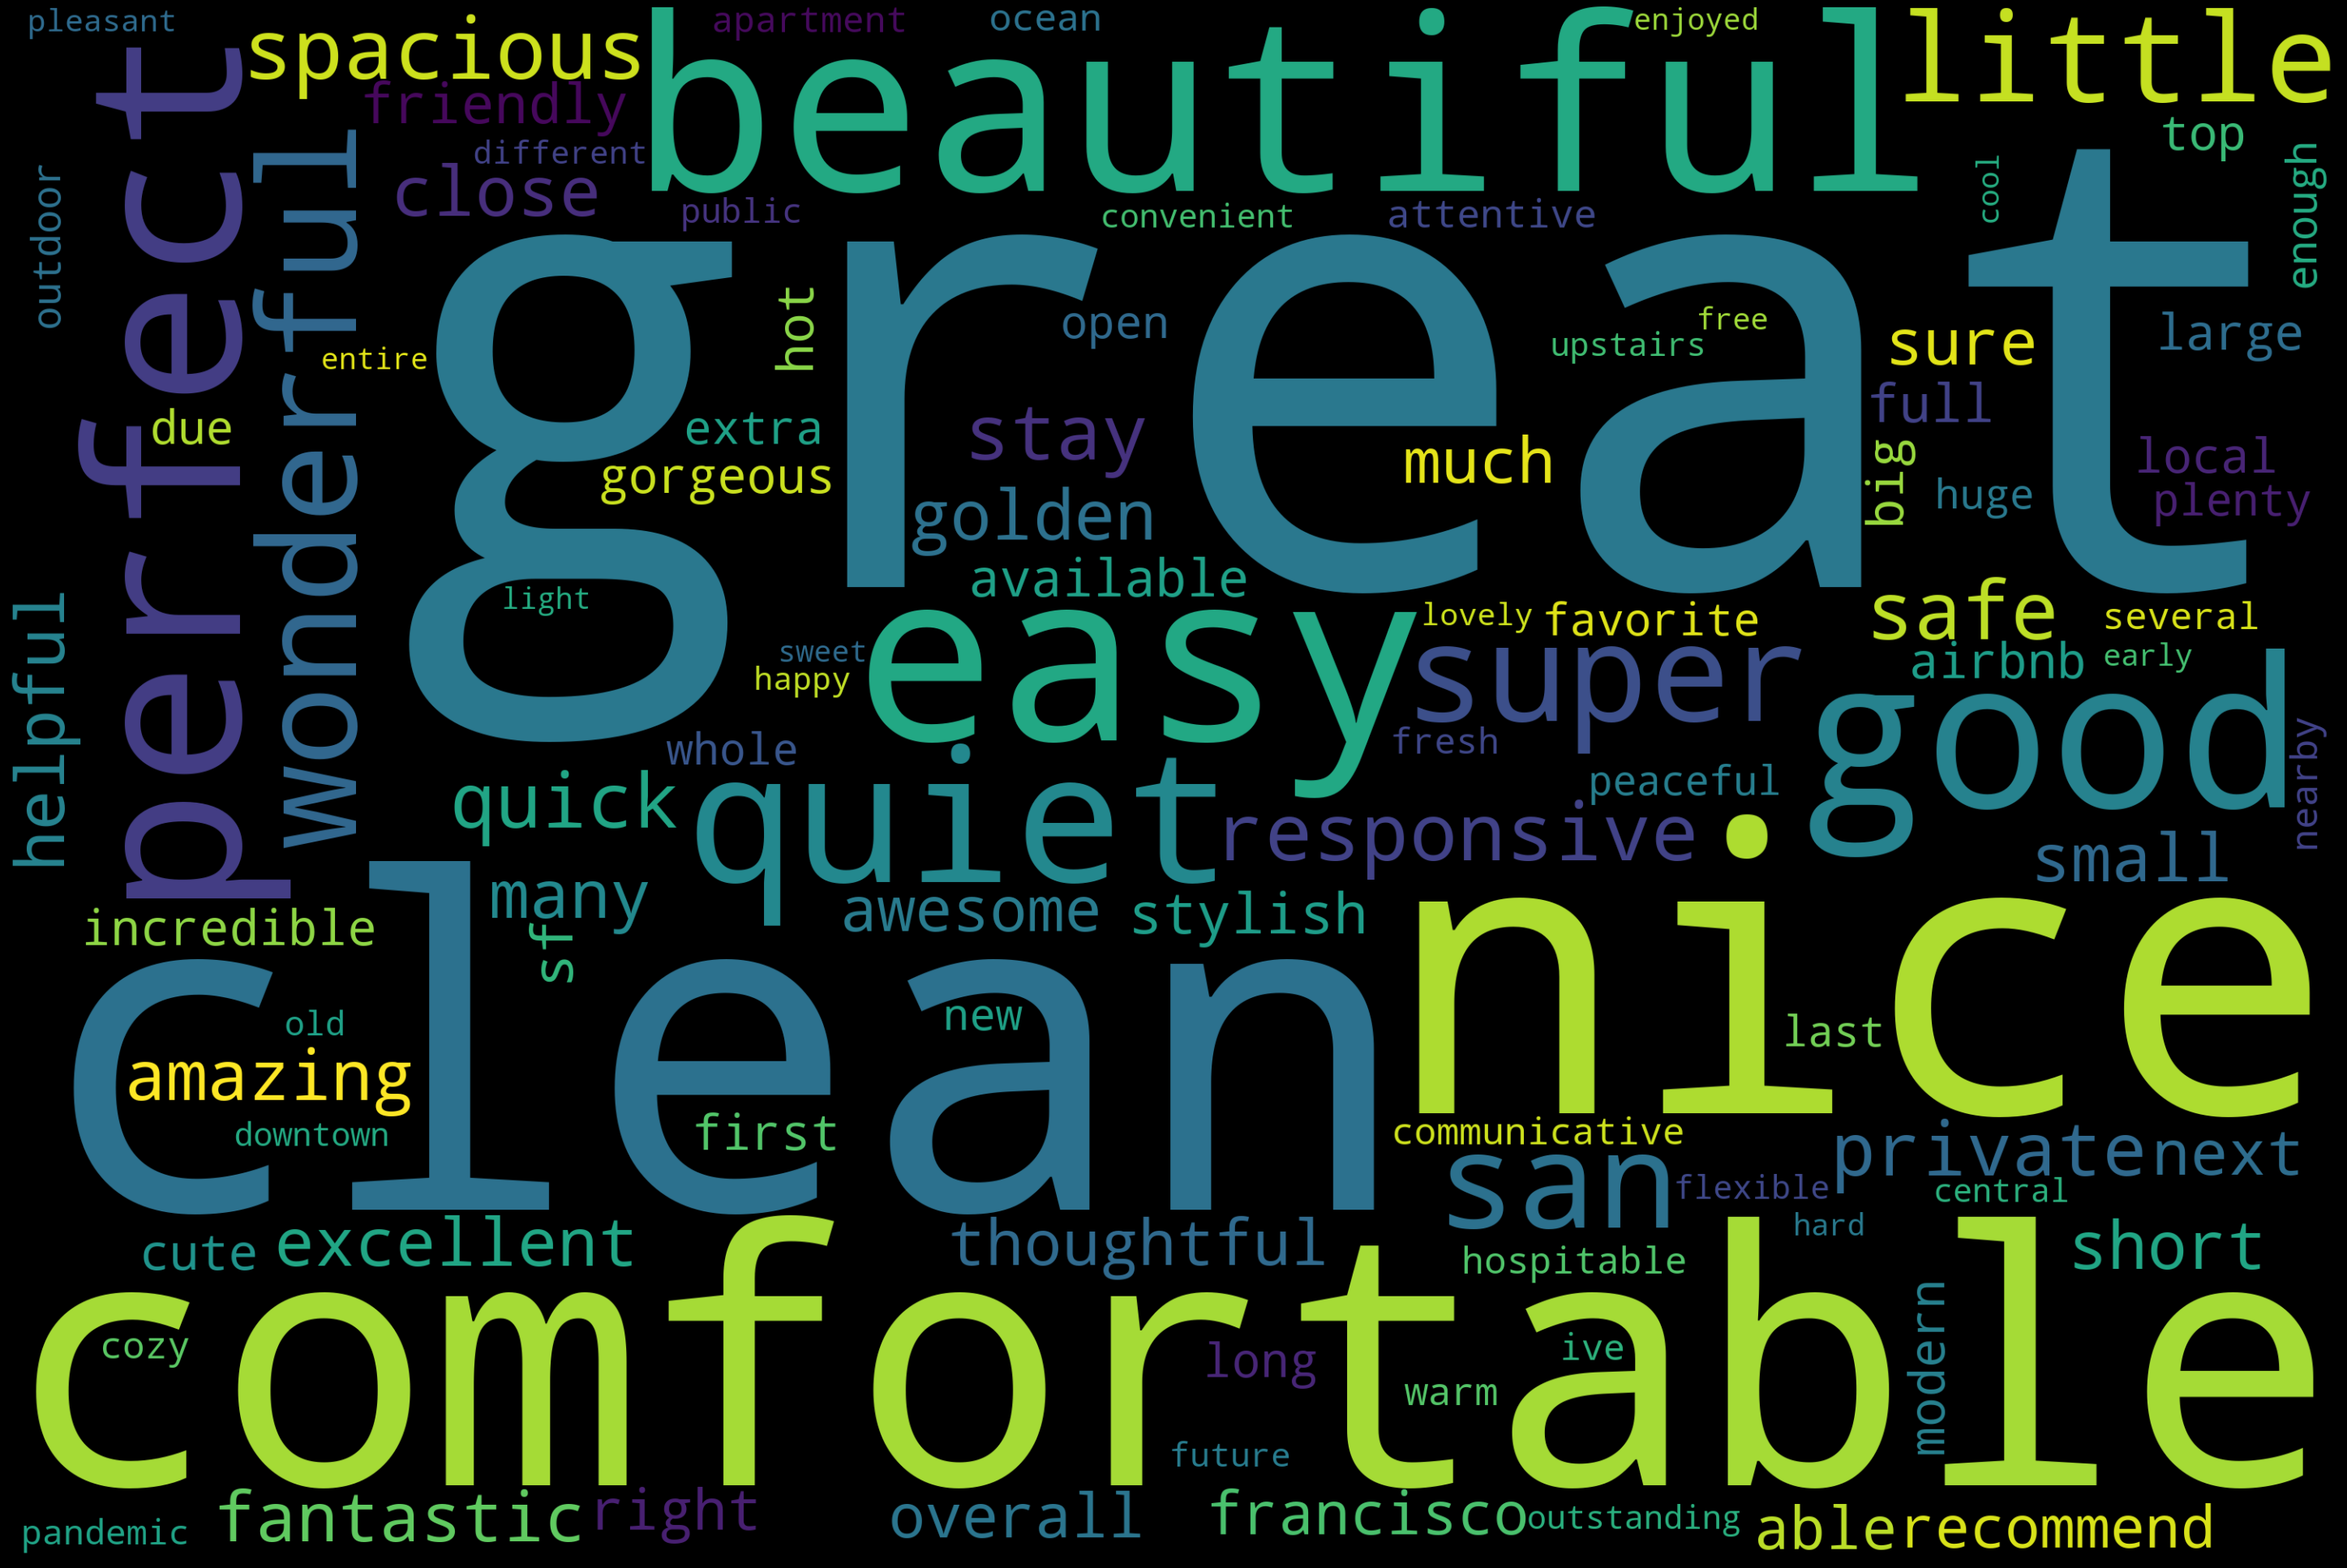

In [45]:
review_list=[reviews_before,reviews_after]
words=[]
for review in review_list:
    wordcloud = WordCloud(
                width = 3000,
                height = 2000,
                background_color = 'black',
                max_words = 100,
                stopwords = STOPWORDS,
                collocations=False).generate(' '.join(review['adjectives']))
    
    words.append(wordcloud.words_)

    fig = plt.figure(
                 figsize = (40, 30),
                 facecolor = 'k',
                edgecolor = 'k')
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

In [46]:
# % change in use of 'clean' frequency in reviews
(words[1]['clean']-words[0]['clean'])*100/words[0]['clean']

0.4213766529896402

There has not been a large increase in the frequency of word clean. Moreover many of the frequent words remained the same before and after pandemic. However words like hospitable, communicative, attentive became more significant. 